In [ ]:
!wget https://www.dropbox.com/s/nf48bb0phzm2exk/Lab3.zip
!unzip Lab3.zip
!rm Lab3.zip

--2021-04-23 22:42:32--  https://www.dropbox.com/s/nf48bb0phzm2exk/Lab3.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nf48bb0phzm2exk/Lab3.zip [following]
--2021-04-23 22:42:33--  https://www.dropbox.com/s/raw/nf48bb0phzm2exk/Lab3.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc78213ed8e239fed064bdb74c8.dl.dropboxusercontent.com/cd/0/inline/BNN5FSNul5SawS50-BAtV_KsllEsfiiR61RVCurCClNAoVoRyLQqJSNJbGwy_bb7G-zuX5iS0HqjJ36ZJ-nRZXltYd6oRCR3U5B2omE_50EgSpNQPV2l4g1uDBmXvnjI7in1hbPQBgCoOEYwlIn0P-6J/file# [following]
--2021-04-23 22:42:33--  https://ucc78213ed8e239fed064bdb74c8.dl.dropboxusercontent.com/cd/0/inline/BNN5FSNul5SawS50-BAtV_KsllEsfiiR61RVCurCClNAoVoRyLQqJSNJbGwy_bb7G-zuX5iS0HqjJ36ZJ-nRZXltYd6oRCR3U5B2om

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Contrast Stretching

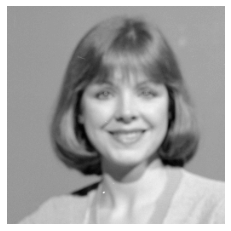

[[107 107 108 ... 113 113 113]
 [108 108 108 ... 112 112 112]
 [108 109 108 ... 113 113 113]
 ...
 [108 107 108 ... 126 126 126]
 [108 108 107 ... 126 126 126]
 [108 109 108 ... 127 128 126]]
55
144
[[149. 149. 152. ... 166. 166. 166.]
 [152. 152. 152. ... 163. 163. 163.]
 [152. 155. 152. ... 166. 166. 166.]
 ...
 [152. 149. 152. ... 203. 203. 203.]
 [152. 152. 149. ... 203. 203. 203.]
 [152. 155. 152. ... 206. 209. 203.]]
[[-42. -42. -44. ... -53. -53. -53.]
 [-44. -44. -44. ... -51. -51. -51.]
 [-44. -46. -44. ... -53. -53. -53.]
 ...
 [-44. -42. -44. ... -77. -77. -77.]
 [-44. -44. -42. ... -77. -77. -77.]
 [-44. -46. -44. ... -79. -81. -77.]]


(<matplotlib.image.AxesImage at 0x7efc7a8068d0>, (-0.5, 255.5, 255.5, -0.5))

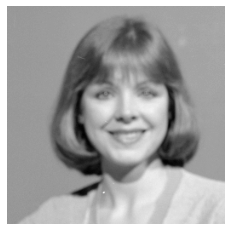

In [ ]:
# image before contrast stretching
lady_img = cv2.imread('./Lab3/lady_img.png', 0)
plt.imshow(lady_img, cmap='gray'), plt.axis("off")
plt.show()
lady_img = np.asarray(lady_img)
print(lady_img)
# image after contrast stretching

a= np.min(lady_img)
b= np.max(lady_img)
print(a)
print(b)

image= np.zeros([256,256]) #create a matrix for the new image
#apply the algorithm
for i in range(0,lady_img.shape[0]):
    for j in range(0,lady_img.shape[1]):
        pixel = lady_img.item(i, j)
        new_pixel = ((pixel- a) / (b-a))*255
        new_pixel = round(new_pixel)
        image[i,j] = new_pixel #append the values to the new image
print(image)
new= (lady_img-image)
print(new)
plt.imshow(image,cmap='gray'), plt.axis("off")



### Histogram Equalization

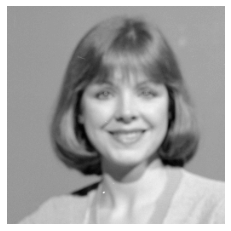

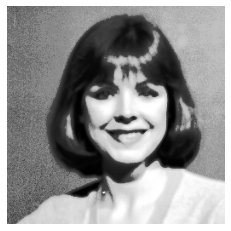

In [ ]:
# image before histogram equalization
lady_img = cv2.imread('./Lab3/lady_img.png', 0)
plt.imshow(lady_img, cmap='gray'), plt.axis("off")
plt.show()

# image after histogram equalization
equ = cv2.equalizeHist(lady_img) #just use equlaization function in cv2
plt.imshow(equ, cmap='gray'), plt.axis("off")
plt.show()

### Automatic Thresholding

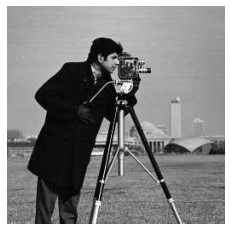

[127]


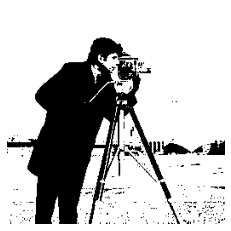

In [ ]:
# image before thresholding
camera_man_img = cv2.imread('./Lab3/camera_man.jpg', 0)
plt.imshow(camera_man_img, cmap='gray'), plt.axis("off")
plt.show()

# image after thresholding
camera_man_img = np.asarray(camera_man_img)

#get the value of L0 
p_min= np.min(camera_man_img)
p_max= np.max(camera_man_img)
L0 = [(p_max+p_min)//2]

#initialize two arrays , one for background pixels and another for foreground pixels
background = []
foreground = []
#apply step 2 in the algorithm and divide the pixels into foreground and background
while True:
  for row in camera_man_img:
    for pixel in row:
      if pixel < L0[-1] : 
        background.append(pixel)
      else:
        foreground.append(pixel)

  #calculate the mean of background and foreground 
  background_mean = np.mean(background)
  foreground_mean = np.mean(foreground)

  L0.append((background_mean + foreground_mean)//2)
 
 #if no change happened between old threshold and new threshold then we reached the optimal threshold
  if L0[-1] == L0[-2] : 
    break

ret,thresh1 = cv2.threshold(camera_man_img,L0[-1],255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray'), plt.axis("off")
plt.show()


##### Python Different Thresholding Methods

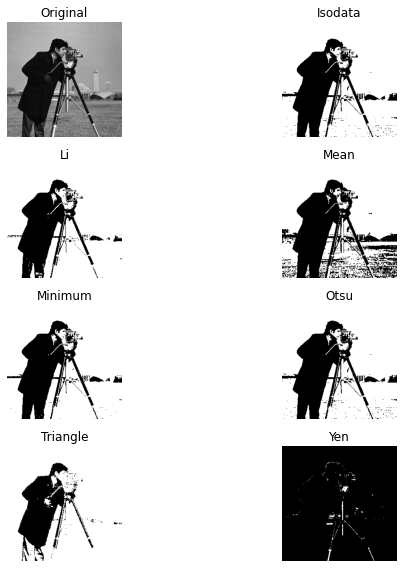

In [ ]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(camera_man_img, figsize=(10, 8), verbose=False)
plt.show()

### Kmeans & Fuzzy c-means

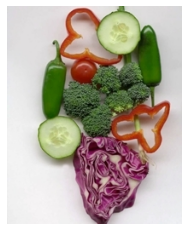

In [ ]:
veggie_img_bgr = cv2.imread('./Lab3/veggie.jpg', cv2.IMREAD_COLOR)
veggie_img = cv2.cvtColor(veggie_img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(veggie_img), plt.axis("off")
plt.show()

k=5 for RGB pixels only

(52480, 3)


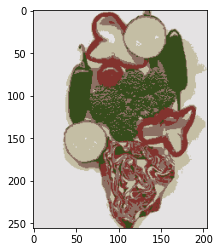

In [ ]:
from sklearn.cluster import KMeans

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = veggie_img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)  

#use kmeans clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(pixel_values)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
#get the centers of the clusters
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
#reshape to the original value
segmentation = segmented_data.reshape((veggie_img.shape))
  
plt.imshow(segmentation)

K=5 for RGB and pixel position (5-D) 

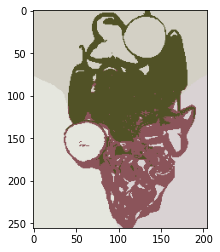

In [ ]:
#convert every pixel to 5D pixel with it's i,j positions and RGB values
pixels = []
for i in range(veggie_img.shape[0]):
  for j in range(veggie_img.shape[1]):
    pixels.append([i,j,veggie_img[i][j][0],veggie_img[i][j][1],veggie_img[i][j][2]])
pixels = np.float32(pixels)

#use kmeans clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(pixels)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
#get the centers of the clusters in the original 5-d space
centers = np.uint8(centers[:,2:])
segmented_data = centers[labels.flatten()]
#reshape to the original value
segmentation = segmented_data.reshape((veggie_img.shape))
  
plt.imshow(segmentation)

In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.8MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=4f02c61c4116875cfde423b9ca1009643ade94283310d4d31eae235d0110a180
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


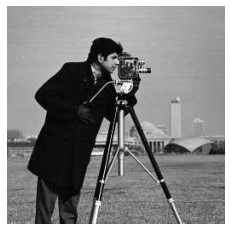

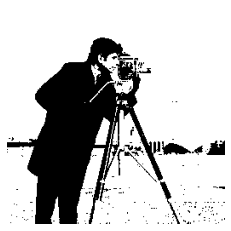

In [ ]:
import skfuzzy as fuzz
# Visit https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html
#show the original image
camera_man_img = cv2.imread('./Lab3/camera_man.jpg', 0)
plt.imshow(camera_man_img, cmap='gray'), plt.axis("off")
plt.show()

#reshape input image to be used in getting the centers
img_pixels = camera_man_img.reshape(-1,1).T
#determine the values of using fuzzy clustring
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    img_pixels, 2, 2, error=0.005, maxiter=1000)

#get the membership of every pixel
cluster_membership = np.argmax(u_orig, axis=0)

#coloring the clusters and corresponding pixels
segmentation = cntr[cluster_membership]
segmentation = (segmentation.reshape(camera_man_img.shape)).astype(int)
# show the image
plt.imshow(segmentation, cmap='gray'), plt.axis("off")
plt.show()